In [13]:
import numpy as np
import pandas as pd

In [14]:
#import data from a CSV file
data=pd.read_csv('marketing_AB.csv')

In [15]:
# Display the first five rows
data.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [16]:
# now first we remove the 'Unnamed :0 ' column
data=data.iloc[:,1:]
data.head()

,user id,test group,converted,total ads,most ads day,most ads hour
0,1069124,ad,False,130,Monday,20
1,1119715,ad,False,93,Tuesday,22
2,1144181,ad,False,21,Tuesday,18
3,1435133,ad,False,355,Tuesday,10
4,1015700,ad,False,276,Friday,14


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user id        588101 non-null  int64 
 1   test group     588101 non-null  object
 2   converted      588101 non-null  bool  
 3   total ads      588101 non-null  int64 
 4   most ads day   588101 non-null  object
 5   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(3), object(2)
memory usage: 23.0+ MB


In [18]:
data.isnull().sum()

user id          0
test group       0
converted        0
total ads        0
most ads day     0
most ads hour    0
dtype: int64

In [19]:
# coverting the 'Converted' column to interger
data['converted']=data['converted'].astype(int)

In [20]:
data.describe()

,user id,converted,total ads,most ads hour
count,5.881010e+05,588101.000000,588101.000000,588101.000000
mean,1.310692e+06,0.025239,24.820876,14.469061
std,2.022260e+05,0.156850,43.715181,4.834634
min,9.000000e+05,0.000000,1.000000,0.000000
25%,1.143190e+06,0.000000,4.000000,11.000000
50%,1.313725e+06,0.000000,13.000000,14.000000
75%,1.484088e+06,0.000000,27.000000,18.000000
max,1.654483e+06,1.000000,2065.000000,23.000000


In [21]:
# count test group
data['test group'].value_counts()

test group
ad     564577
psa     23524
Name: count, dtype: int64

In [22]:
# Check conversion rates
data.groupby('test group')['converted'].mean()

test group
ad     0.025547
psa    0.017854
Name: converted, dtype: float64

T Test

In [23]:
#split data into two groups 
group_ab=data[data['test group']== 'ad']['converted']
group_psa=data[data['test group']== 'psa']['converted']


# perform t-test
import scipy.stats
t_statistic, p_value=scipy.stats.ttest_ind(group_ab,group_psa,equal_var=False)

# Print the results
print(f"T_statistic",t_statistic)
print(f"P_value",p_value)


T_statistic 8.657162314551679
P_value 5.107607598758945e-18


In [25]:
 #Z- TEST

In [26]:

from statsmodels.stats.proportion import proportions_ztest

# Count conversions in each test group
conversion_counts = data.groupby('test group')['converted'].agg([sum, 'count'])
conversion_counts.columns = ['conversions', 'total']

# Extract successes and observations
success = conversion_counts['conversions'].values
nobs = conversion_counts['total'].values

# Perform Z-test for proportions
z_stat, p_value = proportions_ztest(count=success, nobs=nobs, alternative='two-sided')

# Print results
print("Conversion Counts:\n", conversion_counts)
print(f"\nZ-statistic: {z_stat:.4f}")
print(f"P-value: {p_value:.4e}")

# Optional: Decision
alpha = 0.05
if p_value < alpha:
    print("Conclusion: Statistically significant difference (reject H₀)")
else:
    print("Conclusion: No significant difference (fail to reject H₀)")


Conversion Counts:
             conversions   total
test group                     
ad                14423  564577
psa                 420   23524

Z-statistic: 7.3701
P-value: 1.7053e-13
Conclusion: Statistically significant difference (reject H₀)


C:\Users\kgang\AppData\Local\Temp\ipykernel_5076\3776340905.py:4: FutureWarning:

The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.



Chi Square Test

In [27]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(data['test group'], data['converted'])

# Perform Chi-Square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Print results
print("Contingency Table:\n", contingency_table)
print(f"\nChi-square Statistic: {chi2_stat:.4f}")
print(f"P-value: {p_value:.4e}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:\n", expected)

# Conclusion
alpha = 0.05
if p_value < alpha:
    print("Conclusion: Statistically significant association (reject H₀)")
else:
    print("Conclusion: No significant association (fail to reject H₀)")


Contingency Table:
 converted        0      1
test group               
ad          550154  14423
psa          23104    420

Chi-square Statistic: 54.0058
P-value: 1.9990e-13
Degrees of Freedom: 1
Expected Frequencies:
 [[550327.71899045  14249.28100955]
 [ 22930.28100955    593.71899045]]
Conclusion: Statistically significant association (reject H₀)


PEARSON CORRELATION ANALYSIS
measuring the relationship between total ads and conversion

In [28]:
# Pearson correlation between total_ads and converted
from scipy.stats import pearsonr, spearmanr
pearson_corr, pearson_p_value = pearsonr(data['total ads'], data['converted'])

# Spearman correlation between total_ads and converted (non-parametric)
spearman_corr, spearman_p_value = spearmanr(data['total ads'], data['converted'])

print(f"Pearson Correlation: {pearson_corr:.4f}, p-value: {pearson_p_value:.4e}")
print(f"Spearman Correlation: {spearman_corr:.4f}, p-value: {spearman_p_value:.4e}")

Pearson Correlation: 0.2174, p-value: 0.0000e+00
Spearman Correlation: 0.1927, p-value: 0.0000e+00


VISULAIZATIONS

C:\Users\kgang\AppData\Local\Temp\ipykernel_5076\2639542987.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




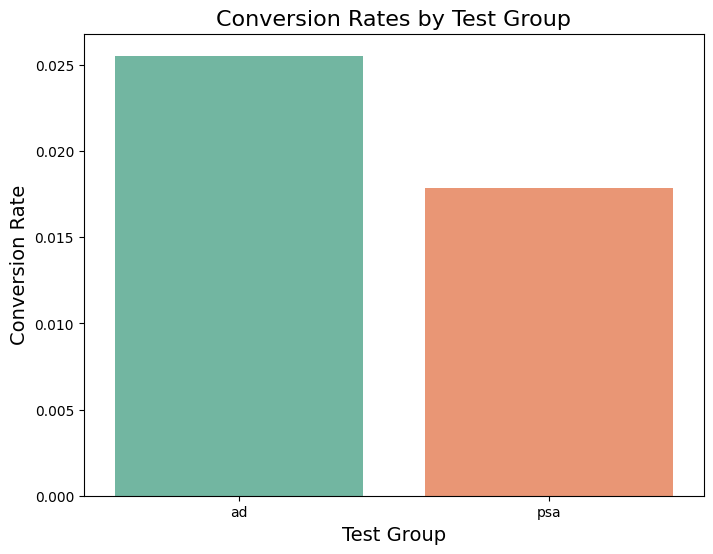

In [29]:
conversion_rate_by_group = data.groupby('test group')['converted'].mean()

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.barplot(x=conversion_rate_by_group.index, y=conversion_rate_by_group.values, palette="Set2")
plt.title('Conversion Rates by Test Group', fontsize=16)
plt.xlabel('Test Group', fontsize=14)
plt.ylabel('Conversion Rate', fontsize=14)
plt.show()

MOST ADS DAY VS CONVERSIONS RATE

<Figure size 1000x600 with 0 Axes>

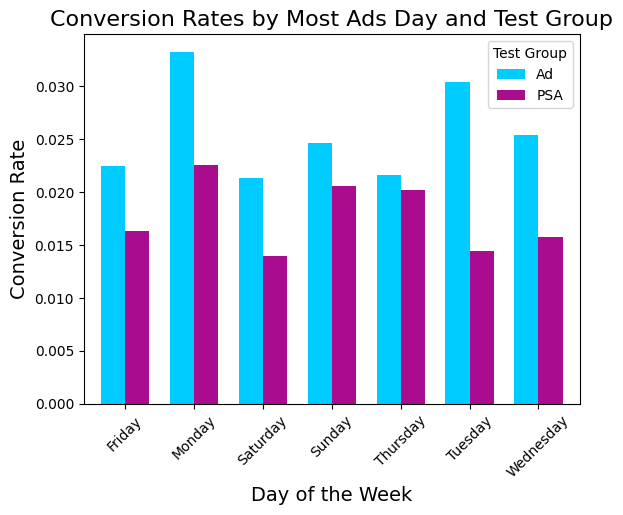

In [30]:
conversion_rate_by_day = data.groupby(['most ads day', 'test group'])['converted'].mean().unstack()

plt.figure(figsize=(10, 6))
conversion_rate_by_day.plot(kind='bar', stacked=False, color=["#00CCFF", "#A90C8F"], width=0.7)
plt.title('Conversion Rates by Most Ads Day and Test Group', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Conversion Rate', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Test Group', labels=['Ad', 'PSA'])
plt.show()

CONVERSION HEATMAP

Showing conversion rate by most ads day and most ads hour

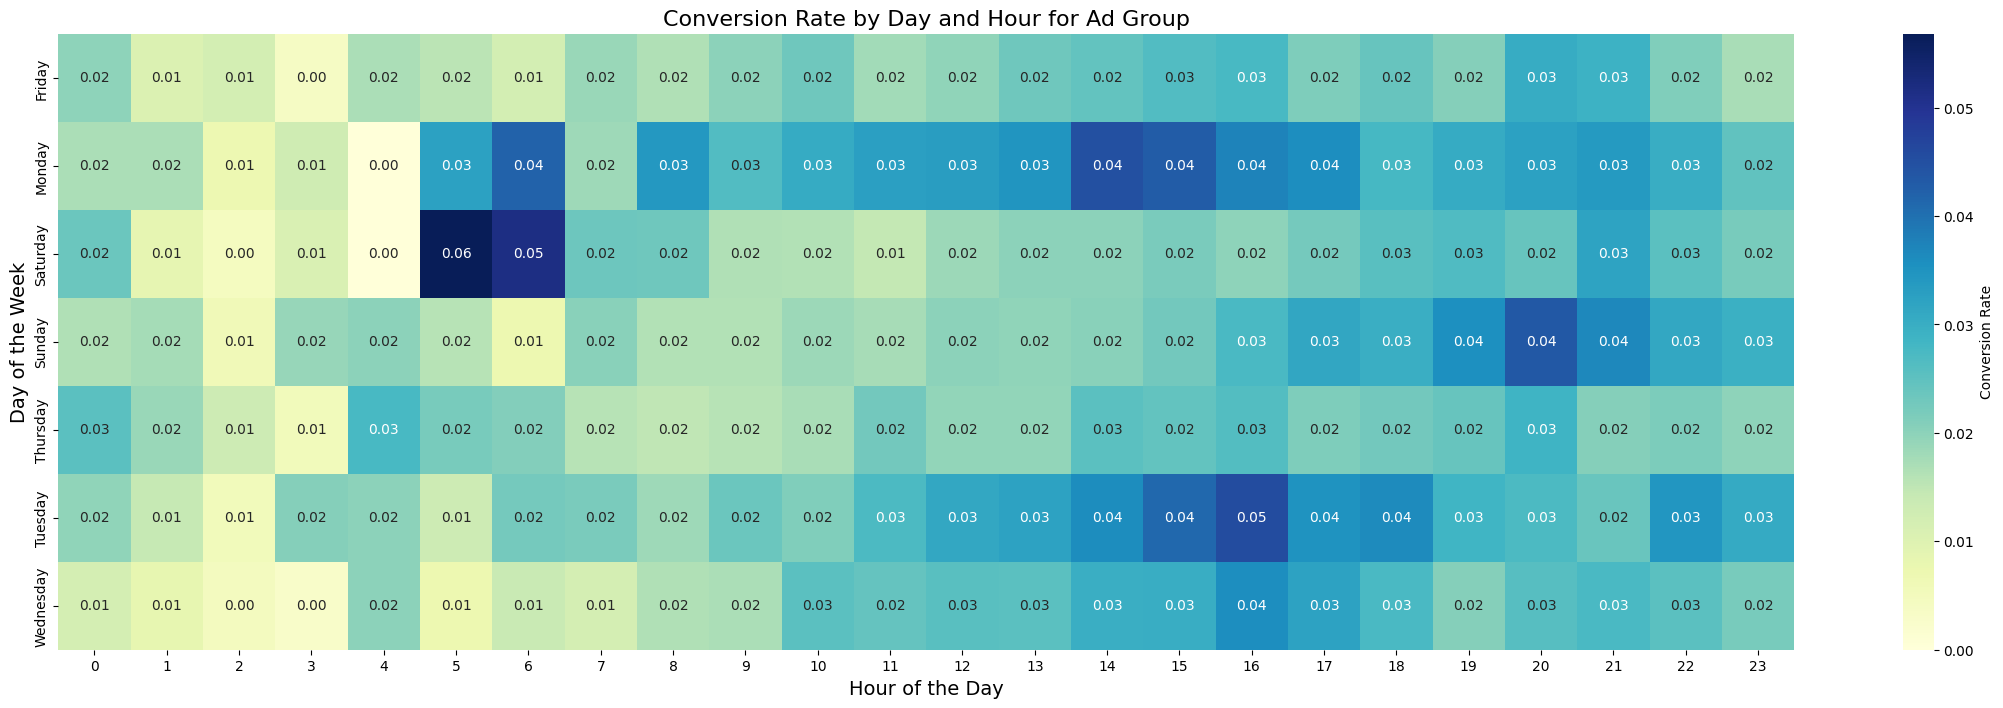

In [31]:
# Heatmap for "ad" group
ad_data = data[data['test group'] == "ad"]

# Create a pivot table for "ad" group
ad_pivot = ad_data.pivot_table(values='converted', 
                               index='most ads day', 
                               columns='most ads hour', 
                               aggfunc='mean', 
                               observed=False)

# Check if pivot table is empty
if ad_pivot.empty:
    print("Warning: Ad group pivot table is empty.")
else:
    # Replace NaN values with 0
    ad_pivot.fillna(0, inplace=True)

    # Plot heatmap for "ad" group
    plt.figure(figsize=(28, 8))
    sns.heatmap(ad_pivot, cmap="YlGnBu", annot=True, fmt='.2f', cbar_kws={'label': 'Conversion Rate'})
    plt.title('Conversion Rate by Day and Hour for Ad Group', fontsize=16)
    plt.xlabel('Hour of the Day', fontsize=14)
    plt.ylabel('Day of the Week', fontsize=14)
    plt.show()



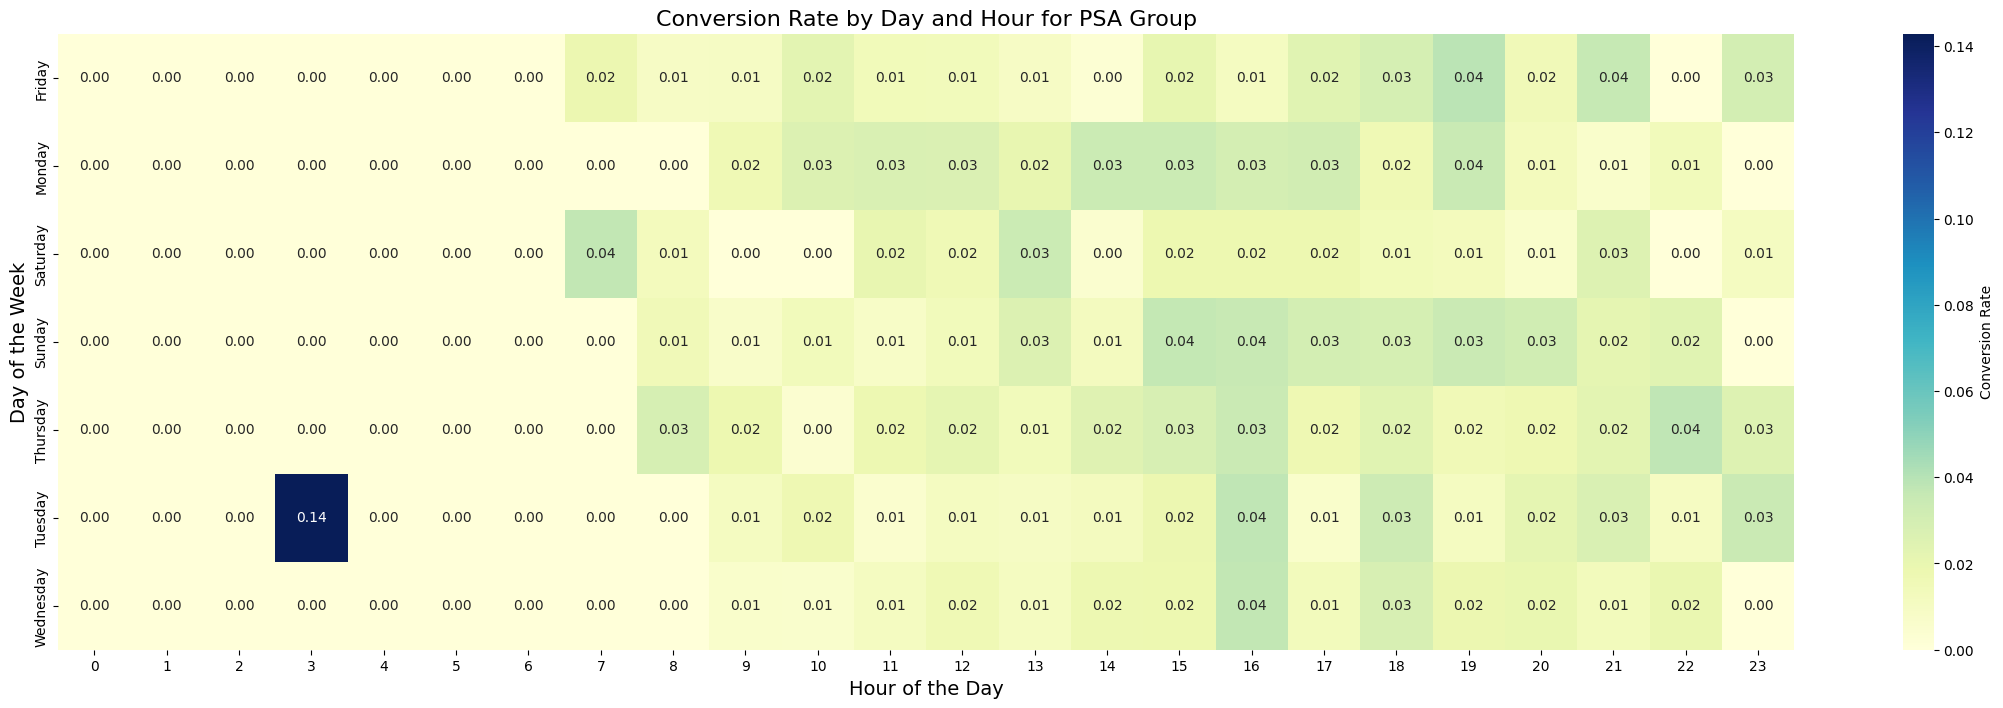

In [32]:
# Heatmap for "psa" group
psa_data = data[data['test group'] == "psa"]

# Create a pivot table for "psa" group
psa_pivot = psa_data.pivot_table(values='converted', 
                                 index='most ads day', 
                                 columns='most ads hour', 
                                 aggfunc='mean', 
                                 observed=False)

# Check if pivot table is empty
if psa_pivot.empty:
    print("Warning: PSA group pivot table is empty.")
else:
    # Replace NaN values with 0
    psa_pivot.fillna(0, inplace=True)

    # Plot heatmap for "psa" group
    plt.figure(figsize=(28, 8))
    sns.heatmap(psa_pivot, cmap="YlGnBu", annot=True, fmt='.2f', cbar_kws={'label': 'Conversion Rate'})
    plt.title('Conversion Rate by Day and Hour for PSA Group', fontsize=16)
    plt.xlabel('Hour of the Day', fontsize=14)
    plt.ylabel('Day of the Week', fontsize=14)
    plt.show()

SANKEY DIAGRAM FOR CONVERSION FLOW

In [33]:
# Create a Sankey diagram
sankey_data = data.groupby(['test group', 'most ads day', 'converted']).size().reset_index(name='count')

# Define labels for each node group
test_group_labels = ['ad', 'psa'] 
day_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
conversion_labels = ['Not Converted', 'Converted']

# Create a combined label list with unique values
labels = test_group_labels + day_labels + conversion_labels

# Define source, target, and value for the Sankey diagram
source = list(sankey_data['test group'].apply(lambda x: test_group_labels.index(x)))
target = list(sankey_data['most ads day'].apply(lambda x: day_labels.index(x) + len(test_group_labels)))  
value = list(sankey_data['count'])

# Convert the conversion status to labels
conversion_source = [day_labels.index(day) + len(test_group_labels) for day in sankey_data['most ads day']]  
conversion_target = [labels.index('Converted') if status == 1 else labels.index('Not Converted') for status in sankey_data['converted']]
conversion_value = list(sankey_data['count'])

# Create Sankey figure
import plotly.graph_objects as go
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels
    ),
    link=dict(
        source=source + conversion_source,
        target=target + conversion_target,
        value=value + conversion_value
    )
))

fig.update_layout(title_text="Sankey Diagram for Conversion Flow", font_size=10)
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed